Initial Data Analysis (EDA) Notebook

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
# Load the data
df = pd.read_csv('stock_price_eng.csv')

In [37]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [38]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9202 non-null   datetime64[ns]
 1   Closing_Price  9202 non-null   float64       
 2   Opening_Price  9202 non-null   float64       
 3   High_Price     9202 non-null   float64       
 4   Low_Price      9202 non-null   float64       
 5   Volume         9202 non-null   object        
 6   Change_Rate    9202 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 503.4+ KB
None


In [39]:
# Display summary statistics
print(df.describe())

                                Date  Closing_Price  Opening_Price  \
count                           9202    9202.000000    9202.000000   
mean   2005-10-21 08:44:04.642469248      92.180961      92.256183   
min              1987-02-12 00:00:00      33.000000      33.000000   
25%              1996-06-06 06:00:00      52.000000      52.100000   
50%              2005-10-11 12:00:00      85.100000      85.100000   
75%              2015-03-04 18:00:00     110.800000     110.800000   
max              2024-08-01 00:00:00     305.900000     309.800000   
std                              NaN      50.452228      50.598215   

        High_Price    Low_Price  
count  9202.000000  9202.000000  
mean     93.176451    91.330146  
min      33.200000    32.200000  
25%      52.800000    51.500000  
50%      86.050000    84.200000  
75%     111.900000   109.275000  
max     311.800000   303.900000  
std      51.049837    50.087405  


In [40]:
# Check for missing values
print(df.isnull().sum())

Date             0
Closing_Price    0
Opening_Price    0
High_Price       0
Low_Price        0
Volume           0
Change_Rate      0
dtype: int64


In [41]:
df.columns

Index(['Date', 'Closing_Price', 'Opening_Price', 'High_Price', 'Low_Price',
       'Volume', 'Change_Rate'],
      dtype='object')

In [42]:
df.head()

,Date,Closing_Price,Opening_Price,High_Price,Low_Price,Volume,Change_Rate
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%


In [43]:
# Function to convert 'M' values to floats
def convert_volume(value):
    if isinstance(value, str) and 'M' in value:
        try:
            return float(value.replace('M', ''))
        except ValueError:
            return np.nan  # Return NaN for invalid entries
    return np.nan  # Non-string values or missing values

In [44]:
# Apply the conversion to the 'Volume' column and create a new column 'Volume_Millions'
df['Volume_Millions'] = df['Volume'].apply(convert_volume)

# Drop rows with NaN values in 'Volume_Millions'
df = df.dropna(subset=['Volume_Millions'])

# Drop the original 'Volume' column
df = df.drop(columns=['Volume'])

# Check the result
df.head()

,Date,Closing_Price,Opening_Price,High_Price,Low_Price,Change_Rate,Volume_Millions
0,2024-08-01,156.3,159.3,159.4,156.1,-2.56%,79.15
1,2024-07-31,160.4,158.2,160.7,158.1,1.07%,173.91
2,2024-07-30,158.7,158.8,159.2,158.0,-0.63%,138.14
3,2024-07-29,159.7,158.7,160.2,158.4,1.14%,126.28
4,2024-07-26,157.9,159.3,159.6,157.9,-0.13%,155.08


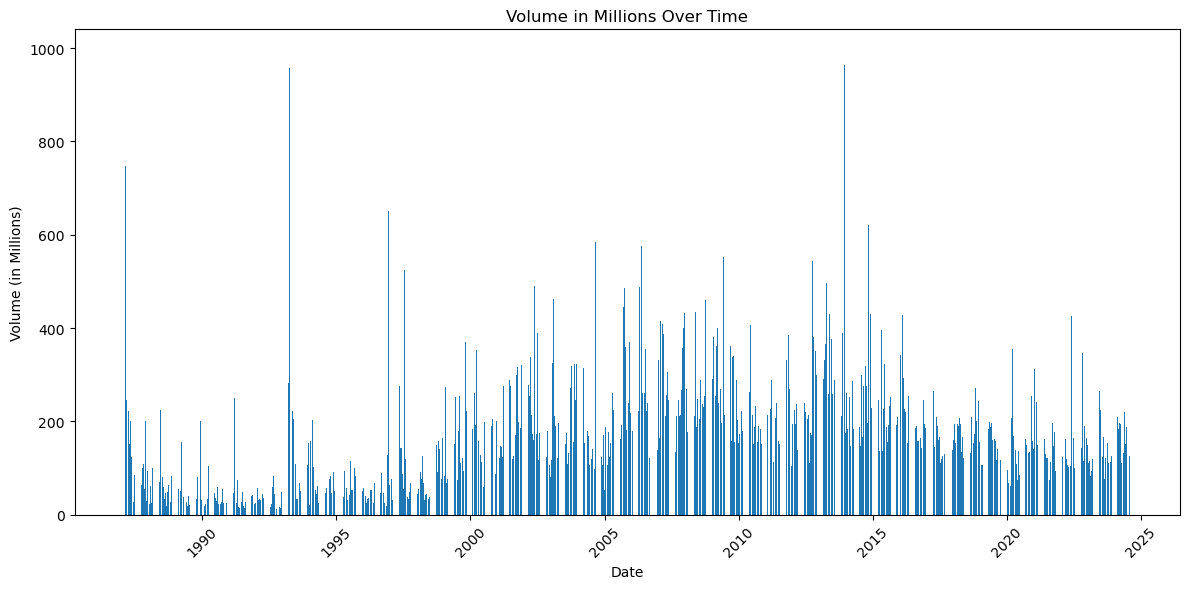

In [50]:
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Volume_Millions'])
plt.title('Volume in Millions Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (in Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
print(df.isnull().sum())

Date               0
Closing_Price      0
Opening_Price      0
High_Price         0
Low_Price          0
Change_Rate        0
Volume_Millions    0
dtype: int64


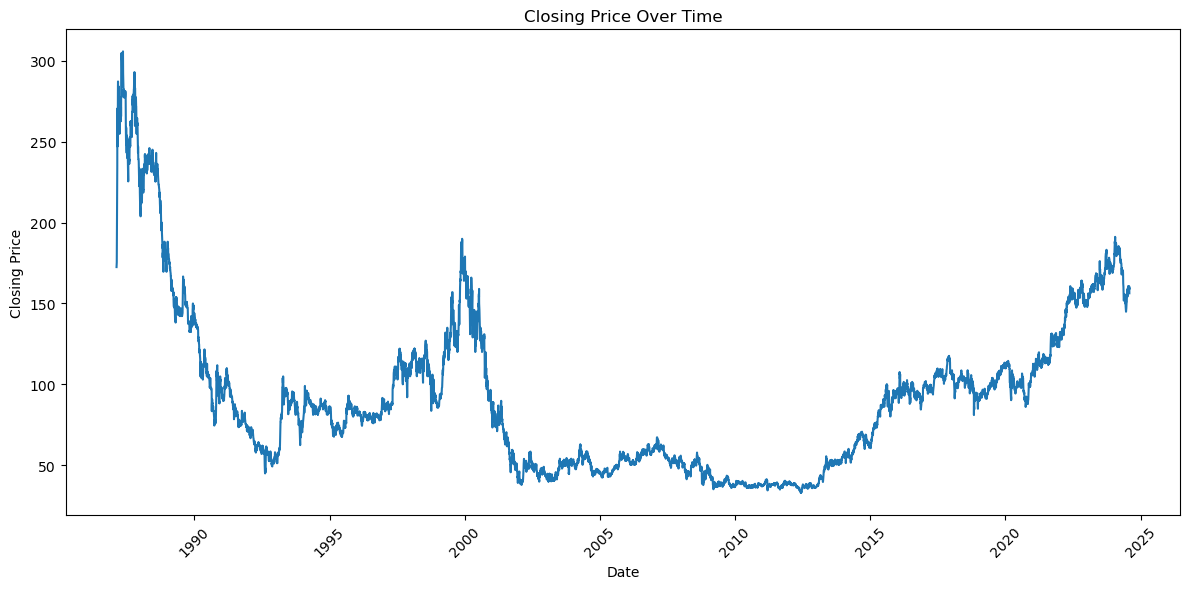

In [52]:
# Plot closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Closing_Price'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

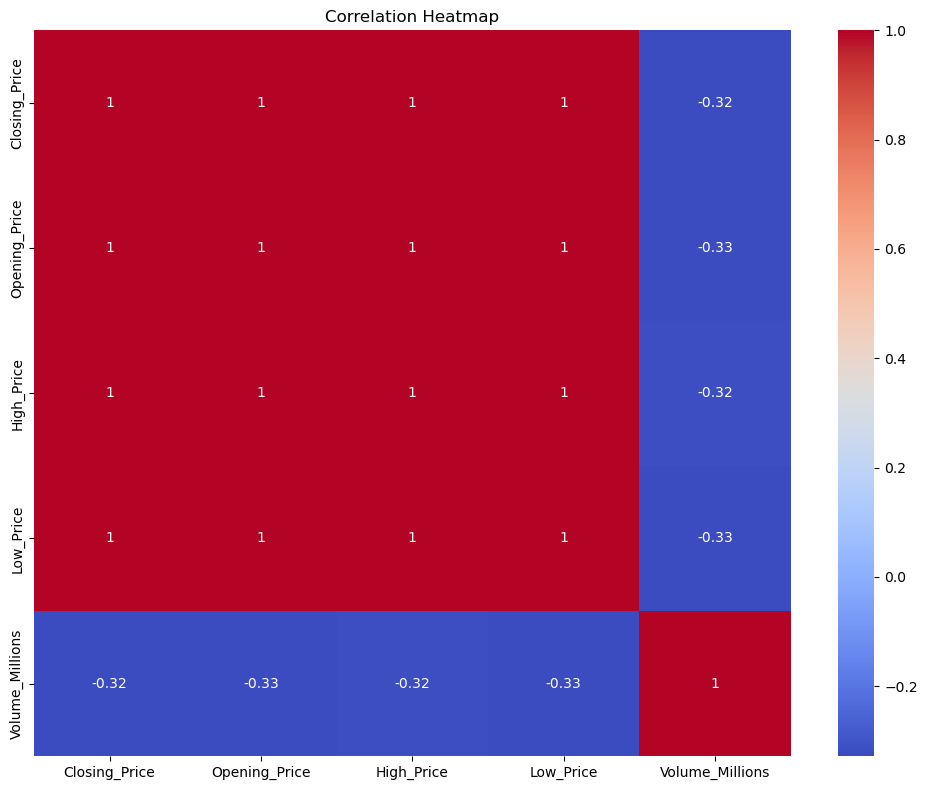

In [53]:
# Correlation heatmap
numeric_columns = ['Closing_Price', 'Opening_Price', 'High_Price', 'Low_Price', 'Volume_Millions']
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

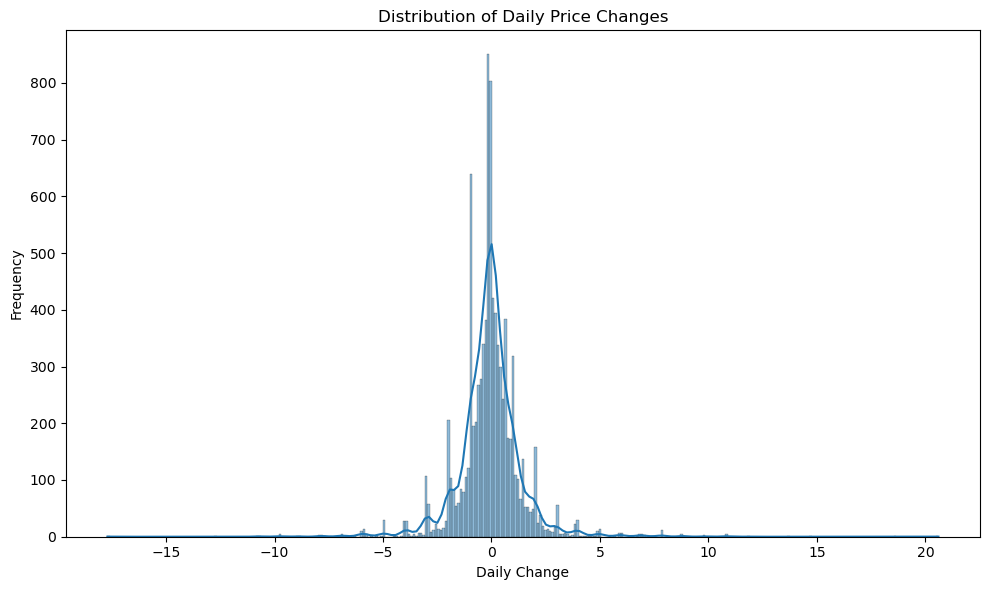

In [54]:
# Distribution of daily price changes
df['Daily_Change'] = df['Closing_Price'] - df['Opening_Price']
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Change'], kde=True)
plt.title('Distribution of Daily Price Changes')
plt.xlabel('Daily Change')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

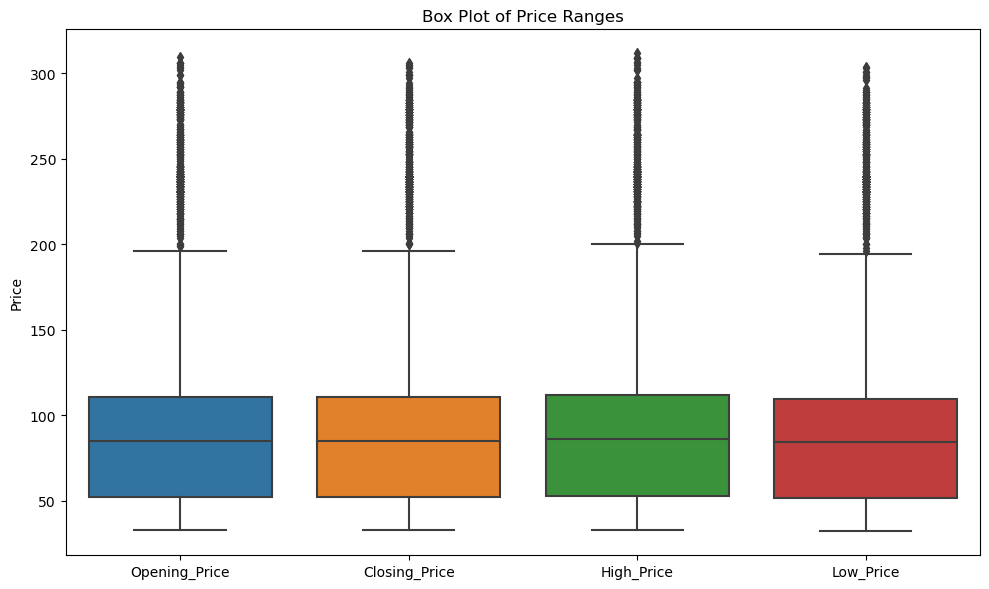

In [55]:
# Box plot of price ranges
price_data = df[['Opening_Price', 'Closing_Price', 'High_Price', 'Low_Price']]
plt.figure(figsize=(10, 6))
sns.boxplot(data=price_data)
plt.title('Box Plot of Price Ranges')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [57]:
# Check the updated DataFrame
df.head()

,Date,Closing_Price,Opening_Price,High_Price,Low_Price,Change_Rate,Volume_Millions,Daily_Change
0,2024-08-01,156.3,159.3,159.4,156.1,-2.56%,79.15,-3.0
1,2024-07-31,160.4,158.2,160.7,158.1,1.07%,173.91,2.2
2,2024-07-30,158.7,158.8,159.2,158.0,-0.63%,138.14,-0.1
3,2024-07-29,159.7,158.7,160.2,158.4,1.14%,126.28,1.0
4,2024-07-26,157.9,159.3,159.6,157.9,-0.13%,155.08,-1.4


In [58]:
# Round the values in the 'Daily_Change' column to 2 decimal places
df['Daily_Change'] = df['Daily_Change'].round(2)

In [59]:
# Save the DataFrame to a CSV file
df.to_csv('stock_post_eda.csv', index=False)